In [35]:
#this decision tree most of time may go to underfitting
#if we use grid search then it may overfit
#draw back of DTR

In [1]:
import os
os.chdir("/Users/darshmac/Documents/cdac/For DBDA/Advance Analytics/Datasets")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.metrics import r2_score

In [5]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [6]:
bos = pd.read_csv("Boston.csv")
bos

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [9]:
bos.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [10]:
bos.columns.nunique()

14

In [13]:
X = bos.drop("medv",axis=1)

In [14]:
y = bos['medv']

###### Label Encoding(no need y is not categorical)

In [15]:
#from sklearn.preprocessing import LabelEncoder

In [16]:
#le = LabelEncoder()

In [17]:
#le_y = le.fit_transform(y)
#print(le.classes_)

In [18]:
# Print the mapping of labels to categories
#label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print("Label Mapping:", label_mapping)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23)

In [45]:
dtr = DecisionTreeRegressor(random_state=23,max_depth=3)

In [46]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=23)

In [47]:
y_pred = dtr.predict(X_test)

In [48]:
print(r2_score(y_test,y_pred))

0.6909298585006427


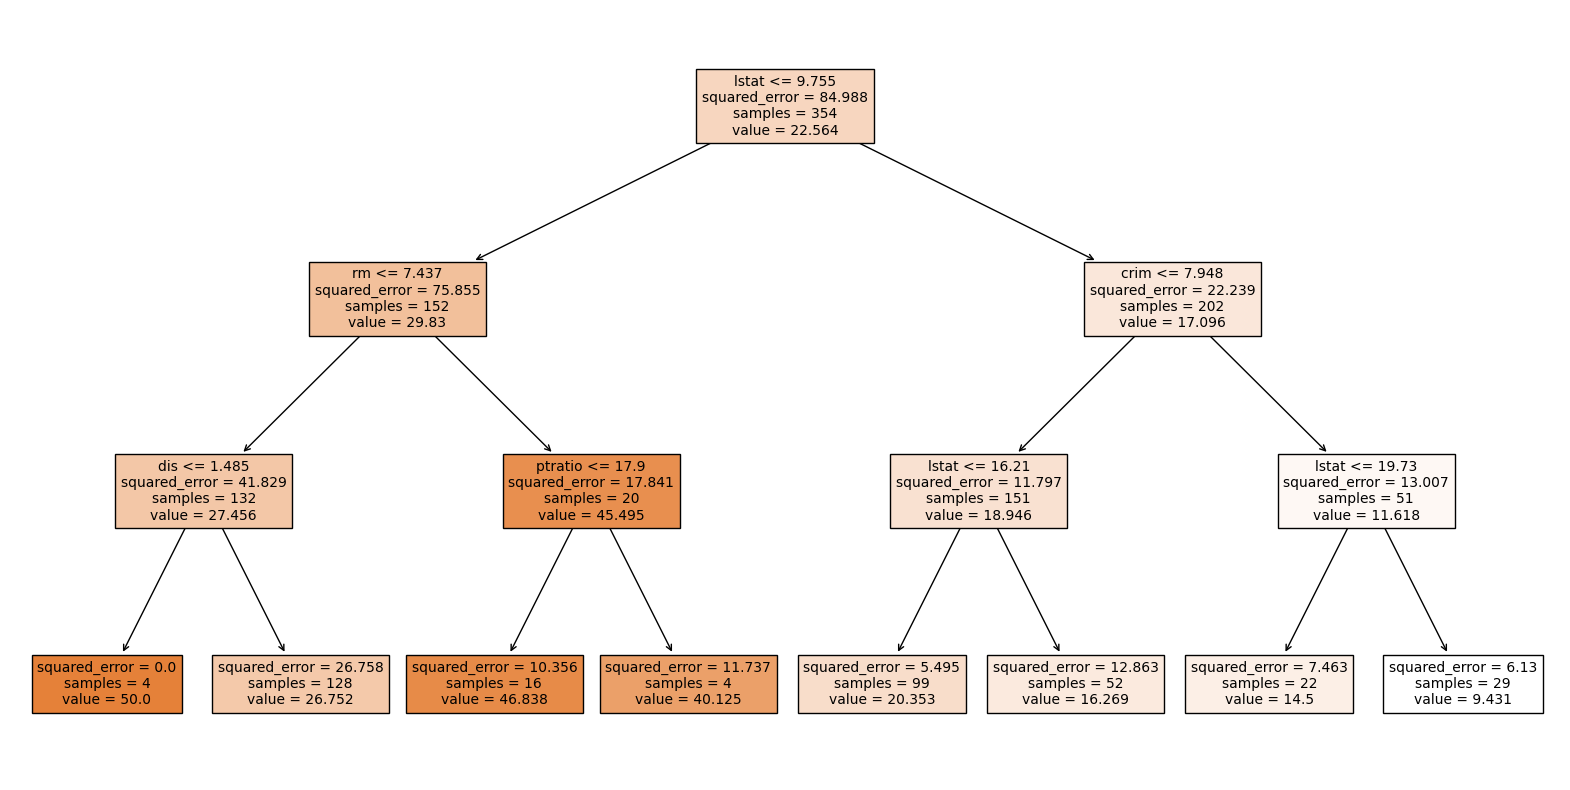

In [50]:
plt.figure(figsize=(20,10))
plot_tree(dtr,feature_names=list(X.columns),
         filled=True,fontsize=10)
plt.show()

In [51]:
#using gcv
dtrg = DecisionTreeRegressor(random_state=23)

In [52]:
kfold = KFold(n_splits=5,shuffle=True,random_state=23)

In [56]:
params = {'min_samples_split':[2,5,10,20,60,80,100],
         'max_depth':[3,4,5,6,7,None],
         'min_samples_leaf':[1,5,10,20]}

In [88]:
gcvg = GridSearchCV(dtrg,param_grid=params,cv=kfold,scoring='r2',verbose=3)#if we dont pass scoring default=r2#verbose for status update

In [89]:
gcvg.fit(X,y)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.704 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.694 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.647 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.569 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.775 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.704 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.694 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.647 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.569 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, 

[CV 3/5] END max_depth=3, min_samples_leaf=10, min_samples_split=80;, score=0.560 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=10, min_samples_split=80;, score=0.591 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=10, min_samples_split=80;, score=0.537 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=10, min_samples_split=100;, score=0.670 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=10, min_samples_split=100;, score=0.726 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=10, min_samples_split=100;, score=0.560 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=10, min_samples_split=100;, score=0.591 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=10, min_samples_split=100;, score=0.537 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=20, min_samples_split=2;, score=0.682 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=20, min_samples_split=2;, score=0.740 total 

[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=10;, score=0.780 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=10;, score=0.766 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=10;, score=0.761 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=10;, score=0.803 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=20;, score=0.760 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=5, min_samples_split=20;, score=0.797 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=5, min_samples_split=20;, score=0.769 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=5, min_samples_split=20;, score=0.774 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=5, min_samples_split=20;, score=0.803 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=5, min_samples_split=60;, score=0.679 total time=   0.0s


[CV 1/5] END max_depth=4, min_samples_leaf=20, min_samples_split=80;, score=0.666 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=20, min_samples_split=80;, score=0.735 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=20, min_samples_split=80;, score=0.608 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=20, min_samples_split=80;, score=0.609 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=20, min_samples_split=80;, score=0.570 total time=   0.0s
[CV 1/5] END max_depth=4, min_samples_leaf=20, min_samples_split=100;, score=0.669 total time=   0.0s
[CV 2/5] END max_depth=4, min_samples_leaf=20, min_samples_split=100;, score=0.729 total time=   0.0s
[CV 3/5] END max_depth=4, min_samples_leaf=20, min_samples_split=100;, score=0.608 total time=   0.0s
[CV 4/5] END max_depth=4, min_samples_leaf=20, min_samples_split=100;, score=0.615 total time=   0.0s
[CV 5/5] END max_depth=4, min_samples_leaf=20, min_samples_split=100;, score=0.570 tota

[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=80;, score=0.606 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=10, min_samples_split=80;, score=0.607 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=10, min_samples_split=80;, score=0.553 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=10, min_samples_split=100;, score=0.669 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=10, min_samples_split=100;, score=0.729 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=10, min_samples_split=100;, score=0.608 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=10, min_samples_split=100;, score=0.615 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=10, min_samples_split=100;, score=0.564 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=20, min_samples_split=2;, score=0.699 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=20, min_samples_split=2;, score=0.782 total 

[CV 3/5] END max_depth=6, min_samples_leaf=5, min_samples_split=5;, score=0.791 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=5, min_samples_split=5;, score=0.738 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=5, min_samples_split=5;, score=0.830 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=5, min_samples_split=10;, score=0.772 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=5, min_samples_split=10;, score=0.817 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=5, min_samples_split=10;, score=0.791 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=5, min_samples_split=10;, score=0.738 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=5, min_samples_split=10;, score=0.830 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=5, min_samples_split=20;, score=0.782 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=5, min_samples_split=20;, score=0.833 total time=   0.0s
[CV

[CV 5/5] END max_depth=6, min_samples_leaf=20, min_samples_split=80;, score=0.558 total time=   0.0s
[CV 1/5] END max_depth=6, min_samples_leaf=20, min_samples_split=100;, score=0.669 total time=   0.0s
[CV 2/5] END max_depth=6, min_samples_leaf=20, min_samples_split=100;, score=0.729 total time=   0.0s
[CV 3/5] END max_depth=6, min_samples_leaf=20, min_samples_split=100;, score=0.608 total time=   0.0s
[CV 4/5] END max_depth=6, min_samples_leaf=20, min_samples_split=100;, score=0.615 total time=   0.0s
[CV 5/5] END max_depth=6, min_samples_leaf=20, min_samples_split=100;, score=0.570 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.766 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.815 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.892 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=0.743 total time= 

[CV 3/5] END max_depth=7, min_samples_leaf=10, min_samples_split=80;, score=0.606 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=10, min_samples_split=80;, score=0.607 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=10, min_samples_split=80;, score=0.553 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=10, min_samples_split=100;, score=0.669 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=10, min_samples_split=100;, score=0.729 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=10, min_samples_split=100;, score=0.608 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=10, min_samples_split=100;, score=0.615 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=10, min_samples_split=100;, score=0.564 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=20, min_samples_split=2;, score=0.701 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=20, min_samples_split=2;, score=0.783 total 

[CV 2/5] END max_depth=None, min_samples_leaf=5, min_samples_split=5;, score=0.812 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=5, min_samples_split=5;, score=0.805 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=5, min_samples_split=5;, score=0.747 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=5, min_samples_split=5;, score=0.841 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=5, min_samples_split=10;, score=0.771 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=5, min_samples_split=10;, score=0.812 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=5, min_samples_split=10;, score=0.805 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=5, min_samples_split=10;, score=0.747 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=5, min_samples_split=10;, score=0.841 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=5, min_samples_split=20;, score

[CV 3/5] END max_depth=None, min_samples_leaf=20, min_samples_split=20;, score=0.759 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=20, min_samples_split=20;, score=0.742 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=20, min_samples_split=20;, score=0.722 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=20, min_samples_split=60;, score=0.677 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=20, min_samples_split=60;, score=0.759 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=20, min_samples_split=60;, score=0.692 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=20, min_samples_split=60;, score=0.623 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=20, min_samples_split=60;, score=0.683 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=20, min_samples_split=80;, score=0.670 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=20, min_samples_sp

GridSearchCV(cv=KFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=23),
             param_grid={'max_depth': [3, 4, 5, 6, 7, None],
                         'min_samples_leaf': [1, 5, 10, 20],
                         'min_samples_split': [2, 5, 10, 20, 60, 80, 100]},
             scoring='r2', verbose=3)

In [78]:
print(gcvg.best_params_)
print(gcvg.best_score_)

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.817510363856148


In [74]:
best_model = gcvg.best_estimator_

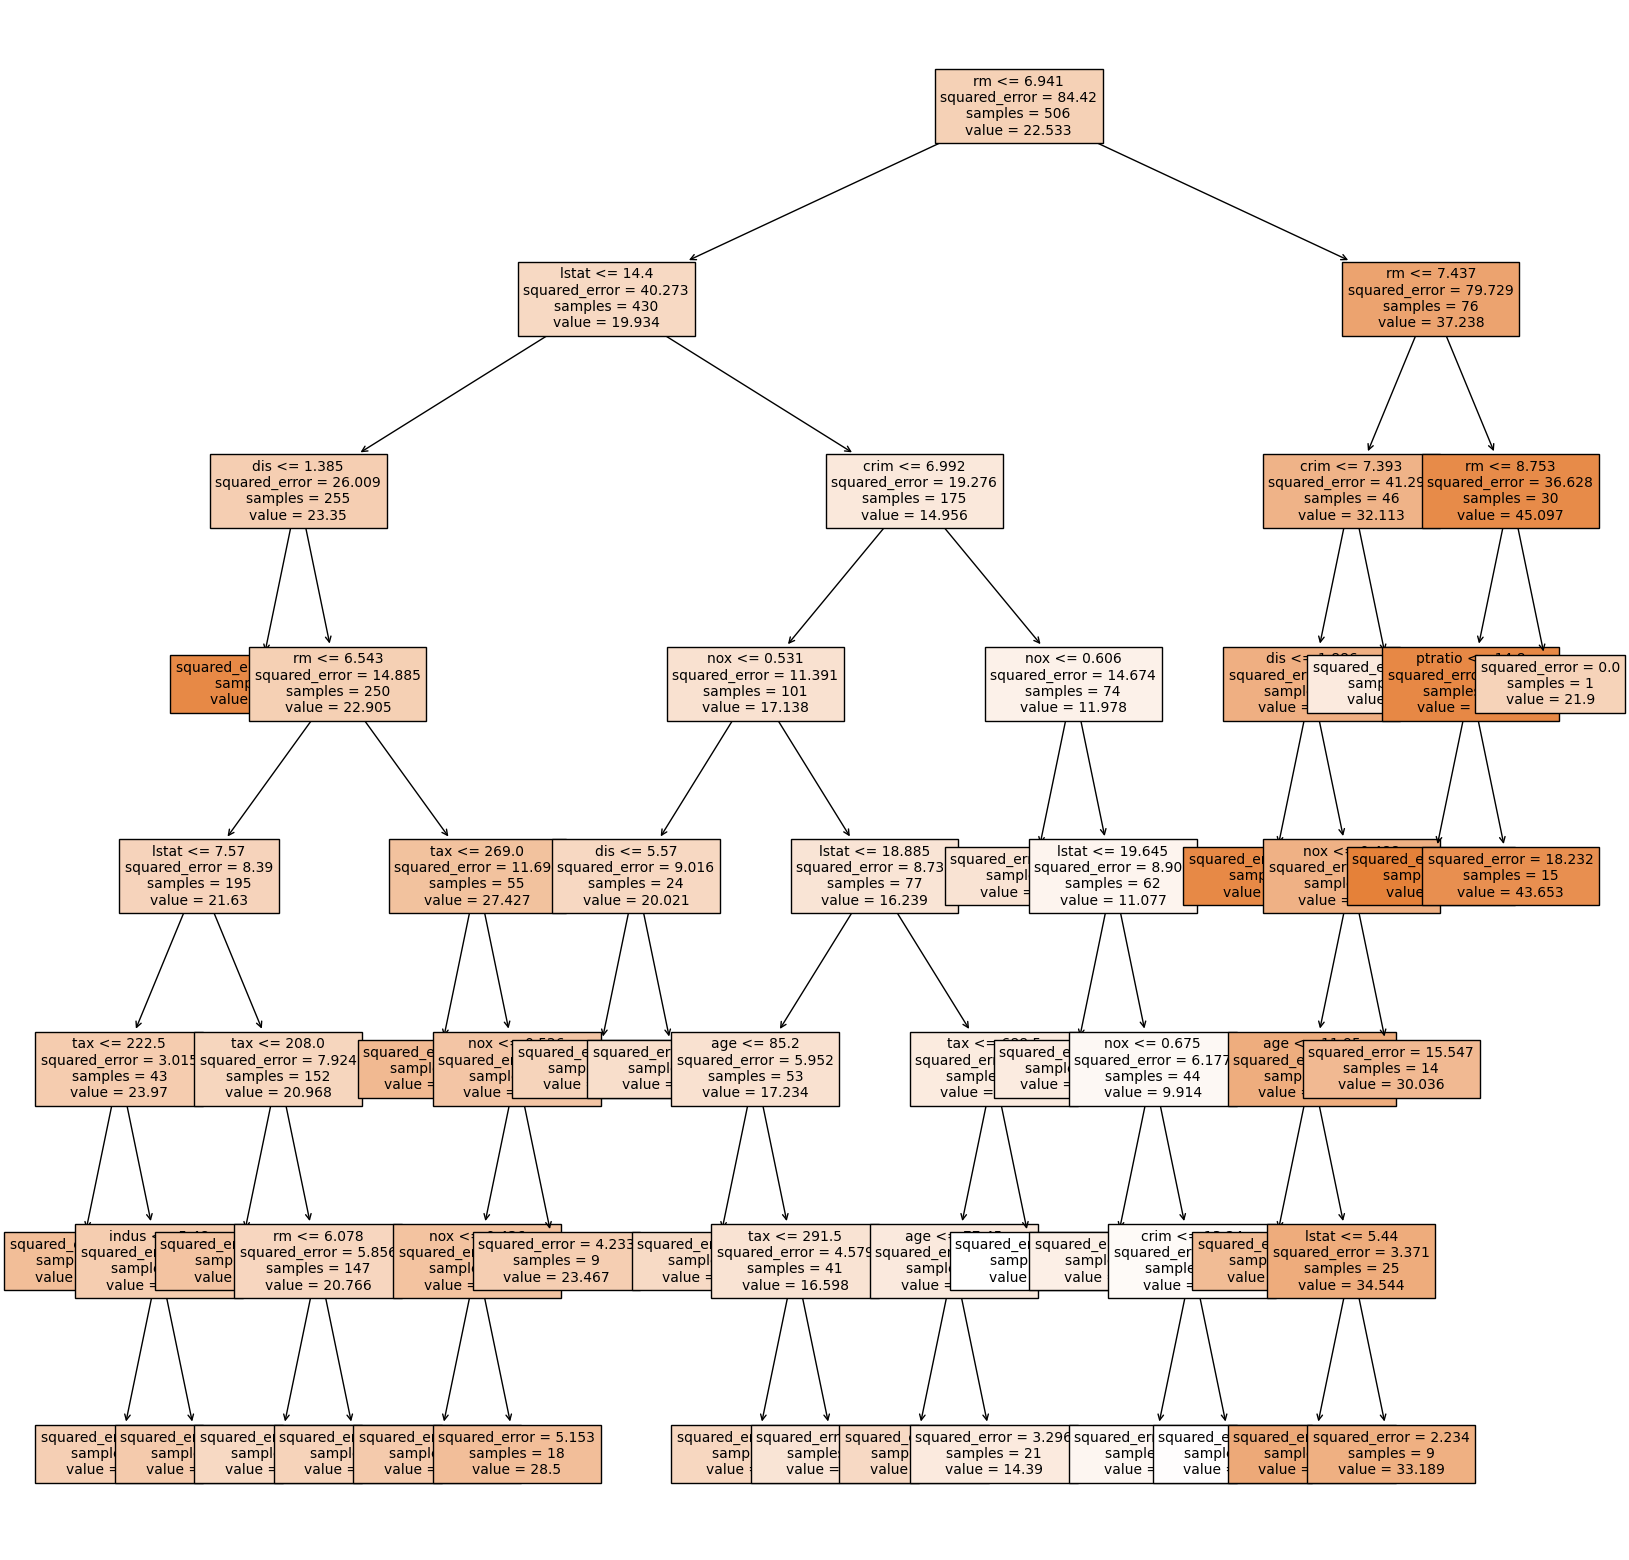

In [90]:
plt.figure(figsize=(20,20))
plot_tree(best_model,feature_names=list(X.columns),
         filled=True,fontsize=10)
plt.show()